# **РК1 по дисциплине Технологии машинного обучения**

**Задание (вариант 19):**

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

**Загрузка и подготовка данных**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Загружаем датасет Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Создаем DataFrame для удобства работы с данными
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Выводим первые строки датасета
print("Первые 5 строк датасета:")
display(df.head())

# Информация о датасете
print("\nИнформация о датасете:")
display(df.info())

print("\nСтатистика по числовым признакам:")
display(df.describe())

Первые 5 строк датасета:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-nu

None


Статистика по числовым признакам:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


**1. Масштабирование числового признака**

Для масштабирования выберем признак 'alcohol'. Применим два популярных метода масштабирования: StandardScaler и MinMaxScaler.


Сравнение оригинального и масштабированных признаков:


,alcohol,alcohol_standardized,alcohol_normalized
0,14.23,1.518613,0.842105
1,13.20,0.246290,0.571053
2,13.16,0.196879,0.560526
3,14.37,1.691550,0.878947
4,13.24,0.295700,0.581579
5,14.20,1.481555,0.834211
6,14.39,1.716255,0.884211
7,14.06,1.308617,0.797368
8,14.83,2.259772,1.000000
9,13.86,1.061565,0.744737


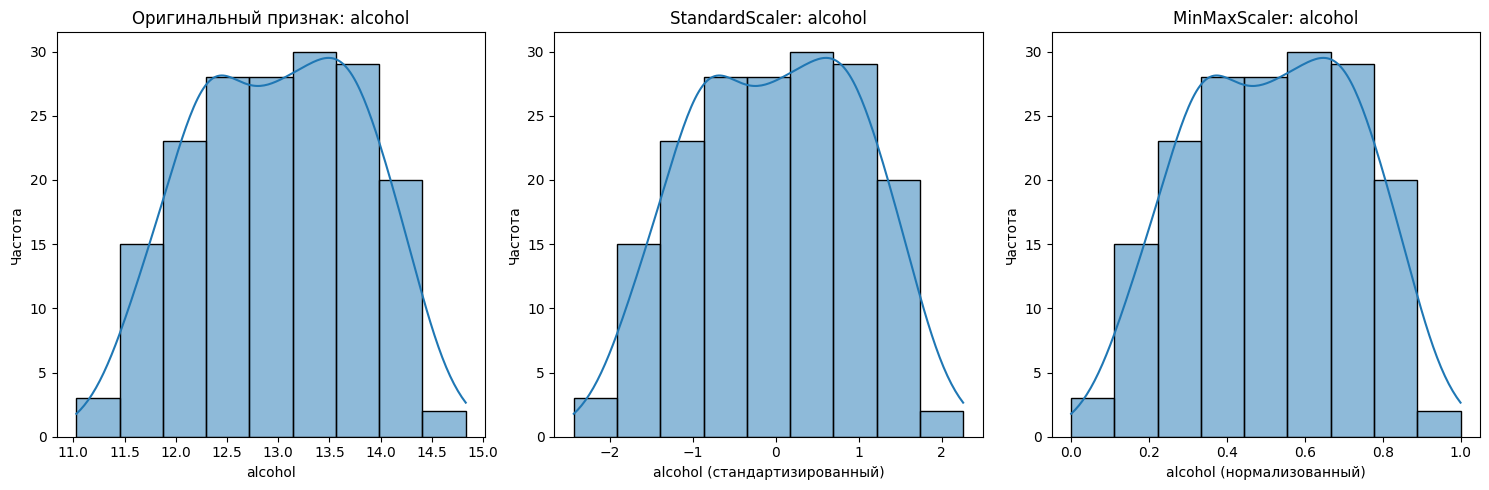

In [3]:
# Выбираем признак для масштабирования
feature_to_scale = 'alcohol'

# 1. Стандартизация (StandardScaler)
scaler_standard = StandardScaler()
df['alcohol_standardized'] = scaler_standard.fit_transform(df[[feature_to_scale]])

# 2. Нормализация (MinMaxScaler)
scaler_minmax = MinMaxScaler()
df['alcohol_normalized'] = scaler_minmax.fit_transform(df[[feature_to_scale]])

# Сравнение оригинального и масштабированных признаков
scaling_comparison = df[[feature_to_scale, 'alcohol_standardized', 'alcohol_normalized']].head(10)
print("\nСравнение оригинального и масштабированных признаков:")
display(scaling_comparison)

# Визуализация результатов масштабирования
plt.figure(figsize=(15, 5))

# Оригинальный признак
plt.subplot(1, 3, 1)
sns.histplot(df[feature_to_scale], kde=True)
plt.title(f'Оригинальный признак: {feature_to_scale}')
plt.xlabel(feature_to_scale)
plt.ylabel('Частота')

# StandardScaler
plt.subplot(1, 3, 2)
sns.histplot(df['alcohol_standardized'], kde=True)
plt.title(f'StandardScaler: {feature_to_scale}')
plt.xlabel(f'{feature_to_scale} (стандартизированный)')
plt.ylabel('Частота')

# MinMaxScaler
plt.subplot(1, 3, 3)
sns.histplot(df['alcohol_normalized'], kde=True)
plt.title(f'MinMaxScaler: {feature_to_scale}')
plt.xlabel(f'{feature_to_scale} (нормализованный)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**2. Преобразование категориального признака**

Поскольку в исходном датасете нет явных категориальных признаков, создадим новый признак на основе 'target' для демонстрации методов кодирования.


Распределение категориального признака 'wine_type':


,count
wine_type,
class_1,71
class_0,59
class_2,48


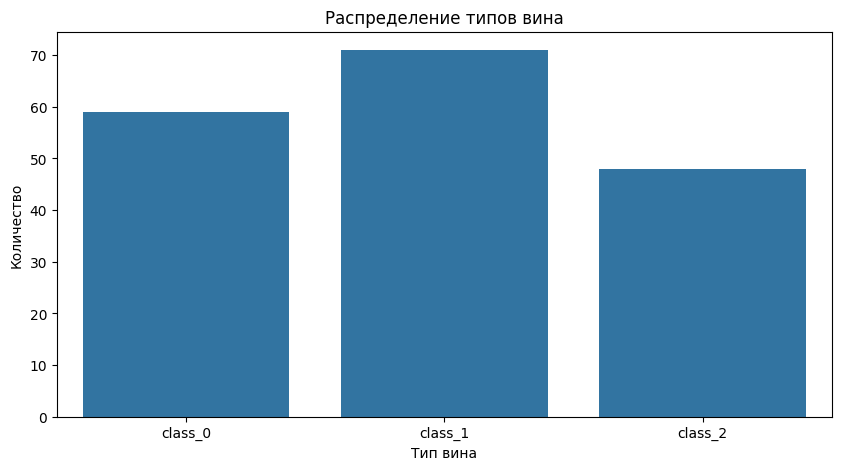

In [4]:
# Создаем категориальный признак на основе целевой переменной
df['wine_type'] = pd.Categorical.from_codes(y, categories=target_names)

# Выводим информацию о новом категориальном признаке
print("\nРаспределение категориального признака 'wine_type':")
display(df['wine_type'].value_counts())

# Визуализация распределения категориального признака
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='wine_type')
plt.title('Распределение типов вина')
plt.xlabel('Тип вина')
plt.ylabel('Количество')
plt.show()

**2.1. Label Encoding**


Результаты Label Encoding:
Соответствие меток: {0: 'class_0', 1: 'class_1', 2: 'class_2'}


,wine_type,wine_type_label
0,class_0,0
59,class_1,1
130,class_2,2


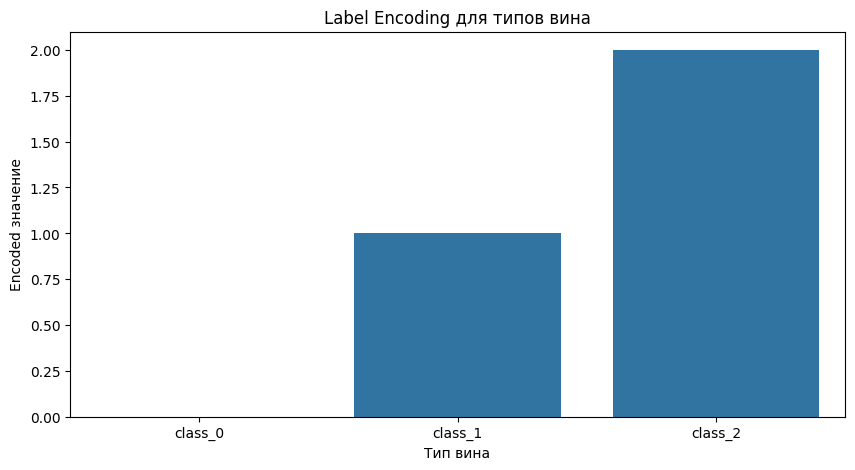

In [5]:
# Label Encoding
le = LabelEncoder()
df['wine_type_label'] = le.fit_transform(df['wine_type'])

# Выводим результаты Label Encoding
print("\nРезультаты Label Encoding:")
mapping = {i: label for i, label in enumerate(le.classes_)}
print(f"Соответствие меток: {mapping}")
display(df[['wine_type', 'wine_type_label']].drop_duplicates())

# Визуализация результатов Label Encoding
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='wine_type', y='wine_type_label')
plt.title('Label Encoding для типов вина')
plt.xlabel('Тип вина')
plt.ylabel('Encoded значение')
plt.show()

**2.2. One Hot Encoding**


Результаты One Hot Encoding:


,wine_type,wine_type_class_0,wine_type_class_1,wine_type_class_2
0,class_0,1.0,0.0,0.0
59,class_1,0.0,1.0,0.0
130,class_2,0.0,0.0,1.0


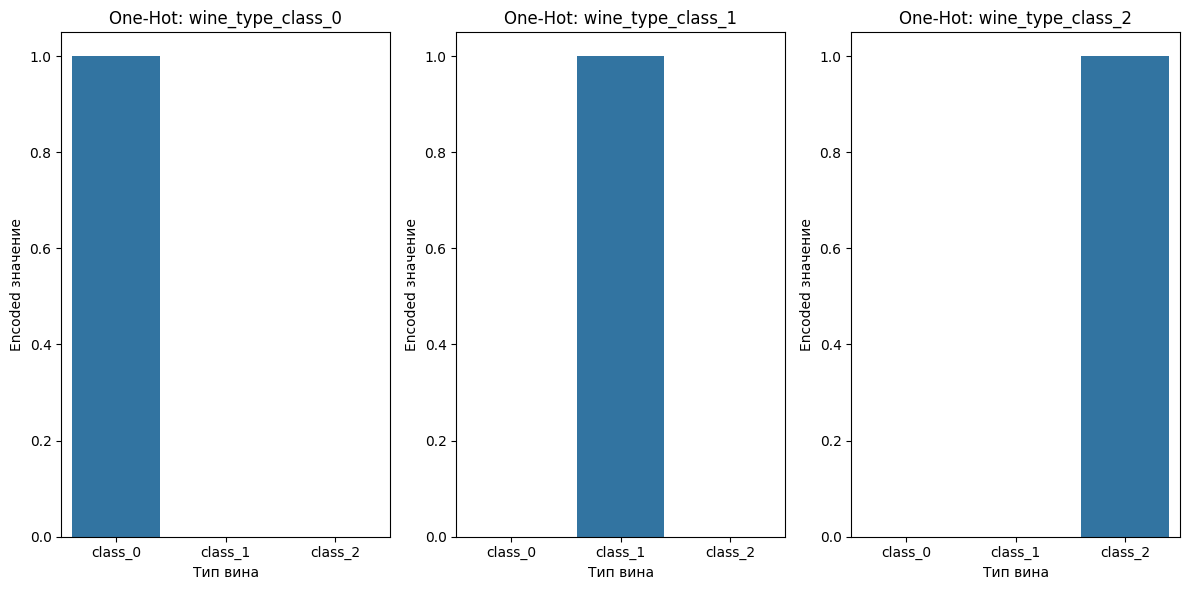

In [6]:
# One Hot Encoding
ohe = OneHotEncoder(sparse_output=False)
wine_type_encoded = ohe.fit_transform(df[['wine_type']])
wine_type_encoded_df = pd.DataFrame(
    wine_type_encoded,
    columns=[f'wine_type_{cat}' for cat in ohe.categories_[0]]
)

# Объединяем с исходным DataFrame
df_with_ohe = pd.concat([df, wine_type_encoded_df], axis=1)

# Выводим результаты One Hot Encoding
print("\nРезультаты One Hot Encoding:")
display(df_with_ohe[['wine_type'] + [f'wine_type_{cat}' for cat in ohe.categories_[0]]].drop_duplicates())

# Визуализация результатов One Hot Encoding
plt.figure(figsize=(12, 6))
for i, cat in enumerate(ohe.categories_[0]):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=df_with_ohe, x='wine_type', y=f'wine_type_{cat}')
    plt.title(f'One-Hot: wine_type_{cat}')
    plt.xlabel('Тип вина')
    plt.ylabel('Encoded значение')

plt.tight_layout()
plt.show()

**3. Сравнение методов преобразования и их применимость**


Статистические показатели до и после масштабирования:


,Статистика,Исходный (alcohol),StandardScaler,MinMaxScaler
0,Минимум,11.030000,-2.434235e+00,0.000000
1,Максимум,14.830000,2.259772e+00,1.000000
2,Среднее,13.000618,-8.382808e-16,0.518584
3,Стандартное отклонение,0.811827,1.002821e+00,0.213639


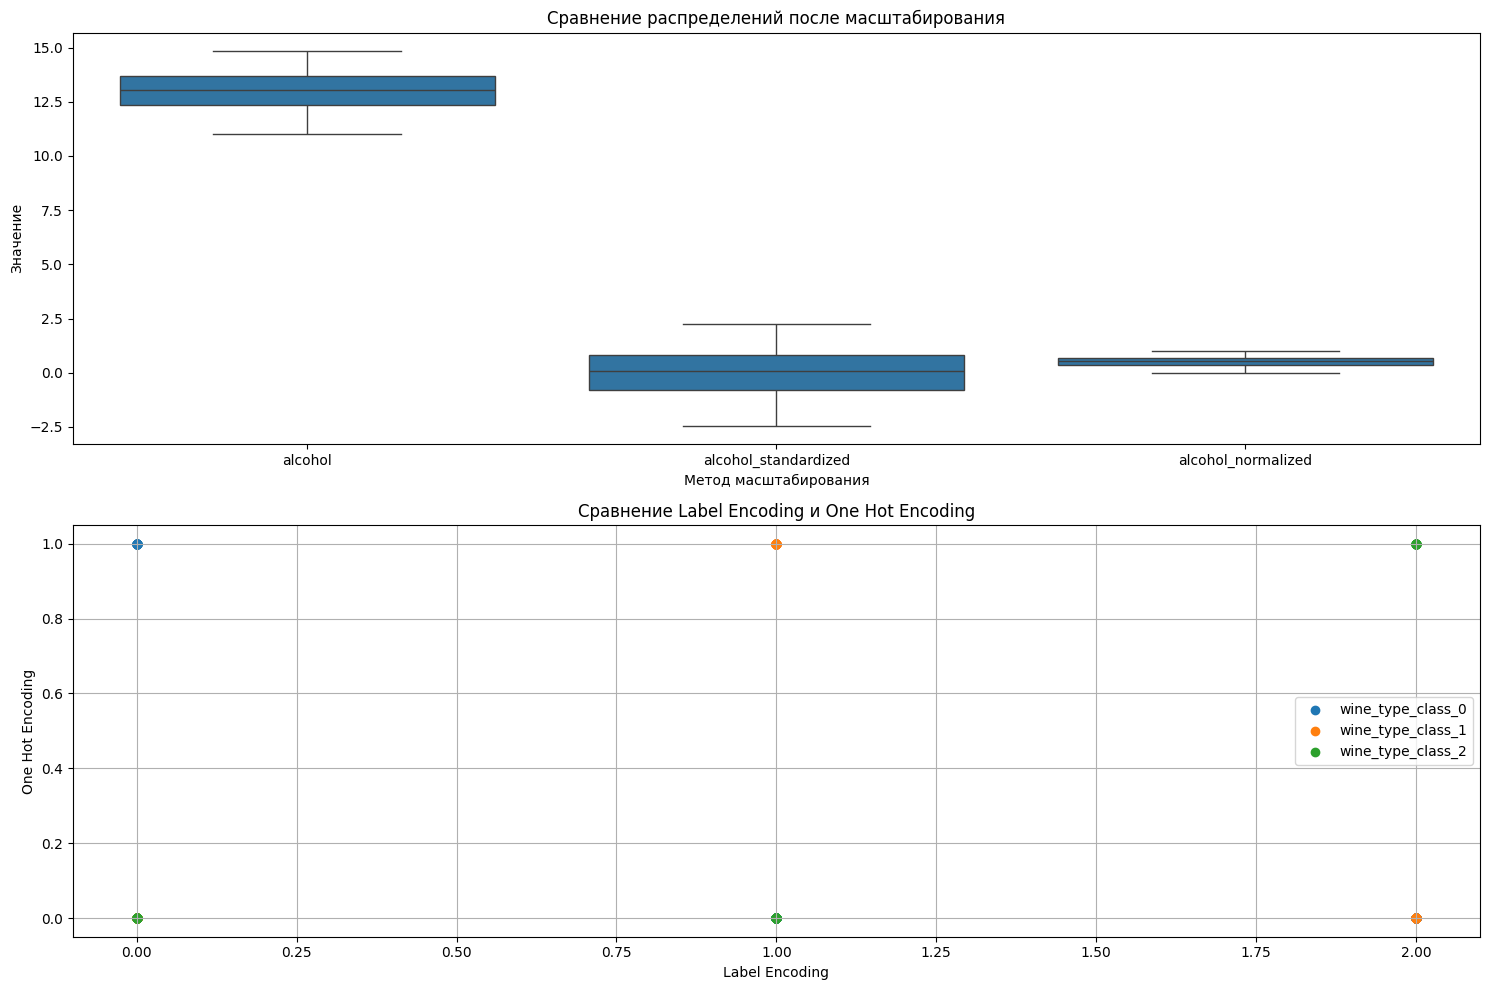

In [8]:
# Сводная таблица статистик до и после масштабирования
scaling_stats = pd.DataFrame({
    'Статистика': ['Минимум', 'Максимум', 'Среднее', 'Стандартное отклонение'],
    'Исходный (alcohol)': [df['alcohol'].min(), df['alcohol'].max(),
                          df['alcohol'].mean(), df['alcohol'].std()],
    'StandardScaler': [df['alcohol_standardized'].min(), df['alcohol_standardized'].max(),
                      df['alcohol_standardized'].mean(), df['alcohol_standardized'].std()],
    'MinMaxScaler': [df['alcohol_normalized'].min(), df['alcohol_normalized'].max(),
                    df['alcohol_normalized'].mean(), df['alcohol_normalized'].std()]
})

print("\nСтатистические показатели до и после масштабирования:")
display(scaling_stats)

# Визуализация распределения исходного и преобразованных признаков
plt.figure(figsize=(15, 10))

# Boxplot для сравнения распределений
plt.subplot(2, 1, 1)
df_melt = pd.melt(df[['alcohol', 'alcohol_standardized', 'alcohol_normalized']])
sns.boxplot(data=df_melt, x='variable', y='value')
plt.title('Сравнение распределений после масштабирования')
plt.xlabel('Метод масштабирования')
plt.ylabel('Значение')

# Scatter plot для сравнения Label Encoding и One Hot Encoding
plt.subplot(2, 1, 2)
scatter_df = df[['wine_type', 'wine_type_label']].copy()
scatter_df = pd.concat([scatter_df, wine_type_encoded_df], axis=1)

# Создаем scatter plot для визуализации Label Encoding vs One Hot
for i, cat in enumerate(ohe.categories_[0]):
    plt.scatter(scatter_df['wine_type_label'],
                scatter_df[f'wine_type_{cat}'],
                label=f'wine_type_{cat}')

plt.title('Сравнение Label Encoding и One Hot Encoding')
plt.xlabel('Label Encoding')
plt.ylabel('One Hot Encoding')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()